In [1]:
from pdpbox import pdp
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
raw_data = pd.read_csv("../../data_clean.csv")
data = raw_data[raw_data['birth date'] < 2020].copy()

data['age'] = data['parole board interview date'] - data['birth date']
data['jail duration'] = data['parole board interview date'] - data['year of entry']

others_parole_type =  ['PIE', 'SP CONSDR', 'ECPDO', 'MEDICAL','RESCISSION', 'DEPORT']
data['parole board interview type'] = data['parole board interview type'].replace(others_parole_type, 'OTHERS').replace('SUPP MERIT', 'MERIT TIME').replace('PV REAPP', 'REAPPEAR')

data = data.dropna(axis=0, subset=['crime 1 - class', 'parole eligibility date'])

df_one_hot = pd.get_dummies(data, columns=[
    "sex", "race / ethnicity"], drop_first=True)

df_one_hot = pd.get_dummies(df_one_hot, columns=[
    "crime 1 - class", "crime 2 - class",
    "crime 3 - class", "crime 4 - class",
    "parole board interview type"])

df_one_hot.drop(columns=['release date','birth date', 'year of entry'],inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_one_hot.drop('y',axis=1), df_one_hot['y'], 
                                                    stratify=df_one_hot['y'], test_size=0.3, random_state=42)

In [3]:
# Load the model from the .pkl file
xgb_classifier = pickle.load(open("../model.pkl", "rb"))

In [4]:
data_train, _, _, _ = train_test_split(data.drop('y',axis=1), data['y'],
                                                    stratify=data['y'], test_size=0.3, random_state=42)

## Statistical Parity

### Race / Ethnicity

In [5]:
# Create a contingency table
contingency_table = pd.crosstab(data_train['race / ethnicity'], xgb_classifier.predict(X_train))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0                0     1
race / ethnicity            
AMER IND/ALSK      124   112
ASIAN/PACIFIC       19    77
BLACK             6602  2427
HISPANIC          2432  1451
OTHER              101   144
UNKNOWN            156    73
WHITE             2815  4576
Chi-square value: 2183.3999567943815
P-value: 0.0


### Sex

In [6]:
# Create a contingency table
contingency_table = pd.crosstab(data_train['sex'], xgb_classifier.predict(X_train))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0       0     1
sex                
FEMALE    199  1167
MALE    12050  7693
Chi-square value: 1130.6801158733504
P-value: 7.092827025265842e-248


## Conditional Statistical Parity

In [7]:
# Create three dataframes based on age ranges
data_train_0_30 = data_train[(data_train['age'] >= 0) & (data_train['age'] <= 30)]
data_train_30_50 = data_train[(data_train['age'] > 30) & (data_train['age'] <= 50)]
data_train_50_plus = data_train[data_train['age'] > 50]

X_train_0_30 = X_train[(X_train['age'] >= 0) & (X_train['age'] <= 30)]
X_train_30_50 = X_train[(X_train['age'] > 30) & (X_train['age'] <= 50)]
X_train_50_plus = X_train[X_train['age'] > 50]


### Race / Ethnicity - Ages between 0 and 30

In [8]:
# Create a contingency table
contingency_table = pd.crosstab(data_train_0_30['race / ethnicity'], xgb_classifier.predict(X_train_0_30))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0                0     1
race / ethnicity            
AMER IND/ALSK       39    38
ASIAN/PACIFIC        5    18
BLACK             1670   804
HISPANIC           553   444
OTHER               30    43
UNKNOWN             11    22
WHITE              578  1452
Chi-square value: 704.0389084793584
P-value: 8.212289839881594e-149


### Race / Ethnicity - Ages between 30 and 50

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(data_train_30_50['race / ethnicity'], xgb_classifier.predict(X_train_30_50))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0                0     1
race / ethnicity            
AMER IND/ALSK       70    54
ASIAN/PACIFIC       13    44
BLACK             3244  1189
HISPANIC          1402   789
OTHER               57    81
UNKNOWN             37    35
WHITE             1418  2331
Chi-square value: 1124.068729257814
P-value: 1.2930579279577635e-239


### Race / Ethnicity - Ages 50+

In [10]:
# Create a contingency table
contingency_table = pd.crosstab(data_train_50_plus['race / ethnicity'], xgb_classifier.predict(X_train_50_plus))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0                0    1
race / ethnicity           
AMER IND/ALSK       15   20
ASIAN/PACIFIC        1   15
BLACK             1688  434
HISPANIC           477  218
OTHER               14   20
UNKNOWN            108   16
WHITE              819  793
Chi-square value: 413.7772244287472
P-value: 3.0483076784034425e-86


### Sex - Ages between 0 and 30

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(data_train_0_30['sex'], xgb_classifier.predict(X_train_0_30))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0      0     1
sex               
FEMALE    51   340
MALE    2835  2481
Chi-square value: 234.8635088959887
P-value: 5.184889177194976e-53


### Sex - Ages between 30 and 50

In [12]:
# Create a contingency table
contingency_table = pd.crosstab(data_train_30_50['sex'], xgb_classifier.predict(X_train_30_50))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0      0     1
sex               
FEMALE    94   640
MALE    6147  3883
Chi-square value: 657.805082933518
P-value: 4.484095764103915e-145


### Sex - Ages 50+

In [13]:
# Create a contingency table
contingency_table = pd.crosstab(data_train_50_plus['sex'], xgb_classifier.predict(X_train_50_plus))
print(contingency_table)

# Perform the chi-square test
chi2, p, a, b = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

col_0      0     1
sex               
FEMALE    54   187
MALE    3068  1329
Chi-square value: 230.8468163257105
P-value: 3.896435670465833e-52


## Conditional Statistical Fairness

In [25]:
def preprocess_data(raw_data):
    data = raw_data[raw_data['birth date'] < 2020].copy()
    data['age'] = data['parole board interview date'] - data['birth date']
    data['jail duration'] = data['parole board interview date'] - data['year of entry']
    others_parole_type =  ['PIE', 'SP CONSDR', 'ECPDO', 'MEDICAL','RESCISSION', 'DEPORT']
    data['parole board interview type'] = data['parole board interview type'].replace(others_parole_type, 'OTHERS').replace('SUPP MERIT', 'MERIT TIME').replace('PV REAPP', 'REAPPEAR')
    data = data.dropna(axis=0, subset=['crime 1 - class', 'parole eligibility date'])
    df_one_hot = pd.get_dummies(data, columns=[
        "sex", "race / ethnicity"], drop_first=True)
    df_one_hot = pd.get_dummies(df_one_hot, columns=[
        "crime 1 - class", "crime 2 - class",
        "crime 3 - class", "crime 4 - class",
        "parole board interview type"])
    df_one_hot.drop(columns=['release date','birth date', 'year of entry'], inplace=True)
    return df_one_hot

In [64]:
def replace_predict_chi_square(model, X, column, protected_column, value):
    X_copied = preprocess_data(X)
    unique_values = X[column].unique()
    if X[column].dtype in ['category', 'bool']:
        for unique_value in unique_values:
            if str(unique_value) != 'nan':
                X_copied[column + "_" + str(unique_value)] = int(value == unique_value) 
    else:
        X_copied[column] = value
    y_pred = model.predict(X_copied)
    contingency_table = pd.crosstab(X.loc[X_copied.index][protected_column], y_pred)
    chi2, p, a, b = chi2_contingency(contingency_table)
    return p

In [65]:
import numpy as np
import matplotlib.pyplot as plt
def predict_chi_square(model, X, column, protected_column):
    if X[column].dtype == 'float64':
        values_final = np.linspace(X[column].min(), X[column].max(), 50)
    else:
        values = X[column].unique()
    p_values = []
    values_final = []
    for value in values:
        if not(str(value) == 'nan'):
            p_value = replace_predict_chi_square(model, X, column, protected_column, value)
            p_values.append(p_value)
            values_final.append(value)

    plt.figure()
    plt.plot(values_final, p_values)
    plt.show()

In [66]:
raw_data

,parole board interview date,sex,birth date,race / ethnicity,parole board interview type,year of entry,release date,parole eligibility date,crime 1 - class,crime 2 - class,crime 3 - class,crime 4 - class,min_sentence,max_sentence,count of crimes,y
0,2012,MALE,1981.0,BLACK,INITIAL,2003,2013.0,2012.0,B,E,NaN,NaN,0.0,11.0,2,0
1,2012,MALE,2056.0,BLACK,INITIAL,2004,2012.0,2012.0,C,NaN,NaN,NaN,8.0,10.0,1,0
2,2012,MALE,2059.0,WHITE,REAPPEAR,2005,2012.0,2008.0,E,E,NaN,NaN,4.0,4.0,2,0
3,2012,MALE,1981.0,BLACK,REAPPEAR,2009,2012.0,2010.0,D,NaN,NaN,NaN,2.0,6.0,1,0
4,2012,MALE,1971.0,BLACK,INITIAL,2010,2014.0,2012.0,D,D,D,NaN,6.0,7.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31491,2016,MALE,1945.0,BLACK,REAPPEAR,1996,NaN,2004.0,B,NaN,NaN,NaN,10.0,99.0,1,0
31492,2016,MALE,1974.0,HISPANIC,INITIAL,1997,NaN,2016.0,A,NaN,NaN,NaN,22.0,99.0,1,0
31493,2016,MALE,1965.0,BLACK,REAPPEAR,1998,NaN,2014.0,A,C,D,NaN,25.0,99.0,3,0
31494,2016,MALE,1957.0,WHITE,REAPPEAR,1999,NaN,2008.0,E,B,D,D,10.0,20.0,4,0


[2012, 2013, 2014, 2015, 2016]
[0.0, 0.0, 0.0, 0.0, 0.0]


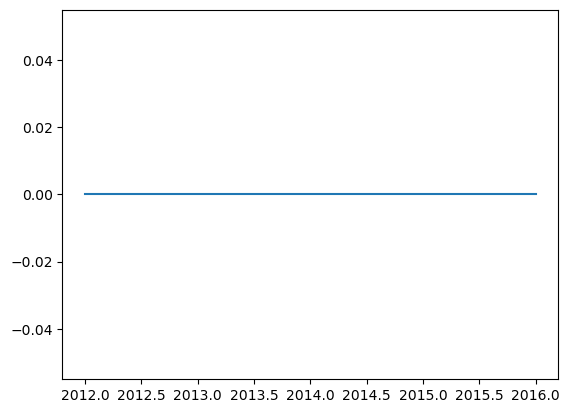

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:sex: object

In [67]:
for feature in raw_data.drop('y', axis=1).columns:
    predict_chi_square(xgb_classifier, raw_data.drop('y', axis=1), feature, 'sex')